# Data Preparation

This notebook is used to prepare the cleaned data for the model.

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Read cleaned data

In [2]:
df = pd.read_csv('processed/cleaned_data.csv')

## 3. Prepare data for EV-bus charging stations

In [3]:
df.rename(columns={'BusDepot [kWh]': 'EV_charging_station'}, inplace=True)

## 4. Combine all data

In [4]:
df['Local'] = pd.to_datetime(df['Local'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Local', inplace=True)

In [5]:
# Add missing values
df.loc['2021-01-01 00:00:00', :] = df.loc['2021-01-01 00:30:00', :]
df.loc['2021-01-01 00:15:00', :] = df.loc['2021-01-01 00:30:00', :]
df.loc['2021-12-31 23:15:00', :] = df.loc['2021-12-31 23:00:00', :]
df.loc['2021-12-31 23:30:00', :] = df.loc['2021-12-31 23:15:00', :]
df.loc['2021-12-31 23:45:00', :] = df.loc['2021-12-31 23:30:00', :]

In [6]:
df

,Office 1,Office 2,Office 3,Office 4,School,EV_charging_station,Irradiance [W/m^2],T_ambient [Degrees Celsius],T_ground [Degrees Celsius],Wind [m/s],Cloud [okta],Pressure [Pa],Rain [mm/hr],Diffuse [W/m^2],Direct [W/m^2],Elevation [Degrees],Azimuth [Degrees],hh1_consumption [kWh],hh2_consumption [kWh],hh3_consumption [kWh]
Local,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-01-01 00:45:00,9.4,5.1,1.8,17.0,11.323333,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.154470,0.123942,0.354953
2021-01-01 01:00:00,9.4,4.8,1.7,21.0,11.915000,5.58,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.149123,0.122407,0.323749
2021-01-01 01:15:00,9.6,4.6,1.8,17.5,11.575000,5.58,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.143373,0.121962,0.301651
2021-01-01 01:30:00,8.7,4.6,1.8,20.0,12.170000,5.58,0.0,2949.0,1625.00,6.938,6124.0,101613804.0,0.055,0.0,0.0,-54847.0,45.722,0.142570,0.118858,0.288491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 00:00:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-01-01 00:15:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-12-31 23:15:00,5.1,5.5,1.5,16.0,11.846364,4.74,0.0,3245.0,2038.00,7.448,6514.0,101634525.0,0.054,0.0,0.0,-58117.0,326.722,0.199495,0.945290,0.445335


## 8. Export data

In [7]:
df.to_csv('processed/model_input_data.csv')

---

In [2]:
# read historical climate data

In [35]:
df = pd.read_csv("raw/tas_timeseries_monthly_cru_1901-2021_NLD.csv")

In [36]:
df['Month'] = pd.date_range(start="01/01/2021", periods=12, freq='M').strftime("%B")

In [41]:
df = df.set_index('Month')

In [47]:
# slice number of years for plotting
years = ['2017', '2018', '2019', '2020', '2021']
df = df[years]

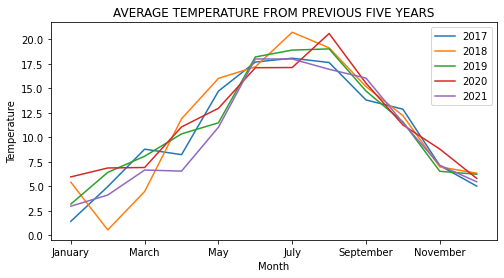

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
df.plot(ax=ax)
ax.set_ylabel('Temperature')
ax.set_title('Average temperature from previous five years'.upper())
plt.savefig("../images/temperature_variation_five_years.png", dpi=300)